In [1]:
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], "src"))

In [2]:
from pkg.utils.utils import *

In [4]:
FREQ = 200

In [3]:
import rospy
rospy.init_node("test")
rate= rospy.Rate(FREQ)

In [5]:
ptimer = PeriodicTimer(1.0/FREQ)

In [10]:
gtimer = GlobalTimer.instance()
gtimer.reset()
rate.sleep()
for _ in range(100):
    with gtimer.block("ros", stack=True):
        time.sleep(0.001)
        rate.sleep()
    
for i in PeriodicIterator(range(100), 1.0/200):
    if i == 0:
        gtimer.tic("piter")
    else:
        gtimer.toctic("piter", "piter", stack=True)
    time.sleep(0.002)
gtimer.toc("piter", stack=True)
    
ptimer.wait()
for i in range(100):
    with gtimer.block("ptimer", stack=True):
        time.sleep(0.001)
        ptimer.wait()

print(gtimer)

ros: 	497.0 ms/100 = 4.975 ms (4.717/5.152)
piter: 	509.0 ms/100 = 5.092 ms (5.021/5.194)
ptimer: 	506.0 ms/100 = 5.055 ms (1.27/5.163)



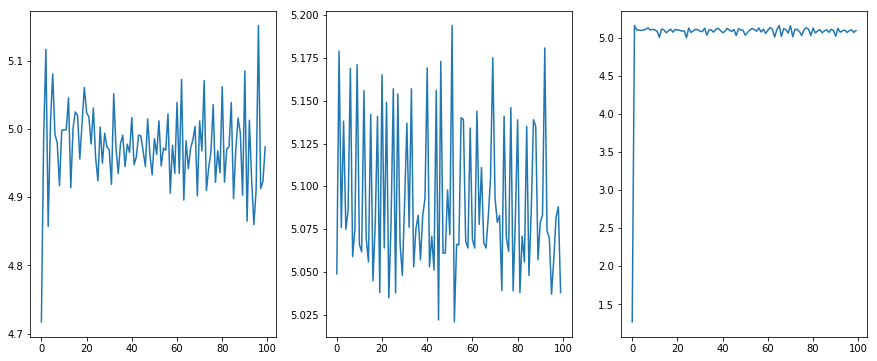

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.plot(gtimer.timelist_dict["ros"])
plt.subplot(1,3,2)
plt.plot(gtimer.timelist_dict["piter"])
plt.subplot(1,3,3)
plt.plot(gtimer.timelist_dict["ptimer"])